In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

In [40]:
ruta = "synthetic_clustering_dataset.csv"
df = pd.read_csv(ruta)

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,14.239607,2.594345,9.852279,8.493489,-3.059534,6.624184,-11.629301,-3.701088,-6.583932,-4.225565,...,0.122547,-7.538008,10.851907,-8.676357,9.422378,2.704539,-7.756966,-12.007984,1.012175,-2.103621
1,-4.501811,3.295469,5.927413,4.468082,-7.544532,-6.022449,-9.815519,9.545159,2.410686,-1.795539,...,-10.081578,-3.486306,1.175264,-0.441783,-4.165788,0.158463,-7.373500,-5.468729,-7.550108,-3.195845
2,11.671308,12.133906,9.846299,6.888675,-2.361483,6.338898,-7.752368,-3.286184,-11.057129,1.257617,...,1.239460,-5.236832,5.312165,-9.410759,7.262799,11.966036,-6.261163,-8.582976,5.675214,8.912807
3,11.654966,3.813415,9.449735,3.737395,-3.803341,6.664735,-8.088641,1.120264,-5.346137,-6.773893,...,3.914561,-8.858868,11.288743,-10.219368,12.400179,5.792793,-3.989292,-12.912704,0.808887,1.320935
4,-12.463043,1.924337,-9.619342,1.633094,4.424415,1.505974,-4.343402,7.959510,-3.815736,-11.059555,...,3.996956,10.812610,-6.651131,6.185787,-2.528879,6.435817,7.282409,-4.509221,-2.845564,-0.542378


In [41]:
# 2. Escalar los datos
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# 3. Aplicar PCA para reducir a 2 dimensiones (solo para visualización)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [43]:
# 4. Aplicar KMeans
k = 15
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_pca)

In [44]:
kmeans.cluster_centers_

array([[-2.43796257,  0.1408683 ],
       [ 1.73400631, -0.95384739],
       [ 1.08937862,  4.56058968],
       [-4.50292517, -1.53259195],
       [ 2.48802378, -2.78109709],
       [-1.78775503,  0.64713626],
       [ 1.27012373, -0.17021643],
       [-4.42692517, -0.67962605],
       [-3.63924577, -1.08958735],
       [ 2.28869331, -0.22088571],
       [ 0.76926786,  3.7360621 ],
       [ 1.71636486,  3.97041981],
       [-0.99934866,  0.3974349 ],
       [ 3.32419821, -2.92423558],
       [-1.67558825, -0.19274352]])

In [45]:
# 5. Definir funciones de visualización como hizo el ingeniero
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)  # ✅ Aquí no se aplica PCA

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

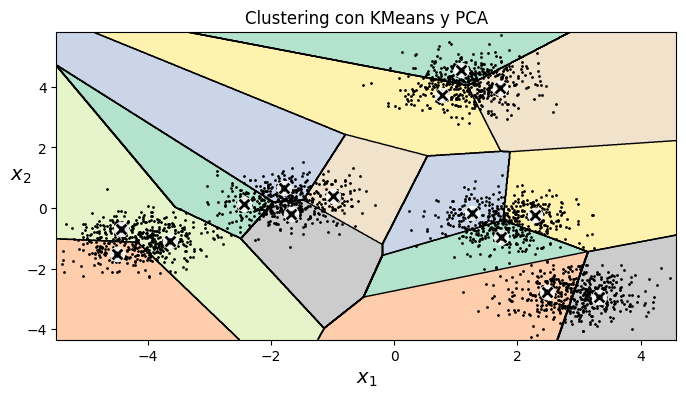

In [46]:
# Luego, ya puedes hacer el gráfico como antes
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_pca)
plt.title("Clustering con KMeans y PCA")
plt.show()

In [47]:
# Configuración de los modelos KMeans con diferentes parámetros
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", max_iter=1, random_state=1)

kmeans_iter2 = KMeans(n_clusters=5, init="k-means++", n_init=1, algorithm="elkan", max_iter=2, random_state=1)

kmeans_iter3 = KMeans(n_clusters=5, init="k-means++", n_init=1, algorithm="elkan", max_iter=3, random_state=1)

In [48]:
# Ajustamos los modelos con los datos
kmeans_iter1.fit(X_pca)
kmeans_iter2.fit(X_pca)
kmeans_iter3.fit(X_pca)

KMeans(algorithm='elkan', max_iter=3, n_clusters=5, n_init=1, random_state=1)

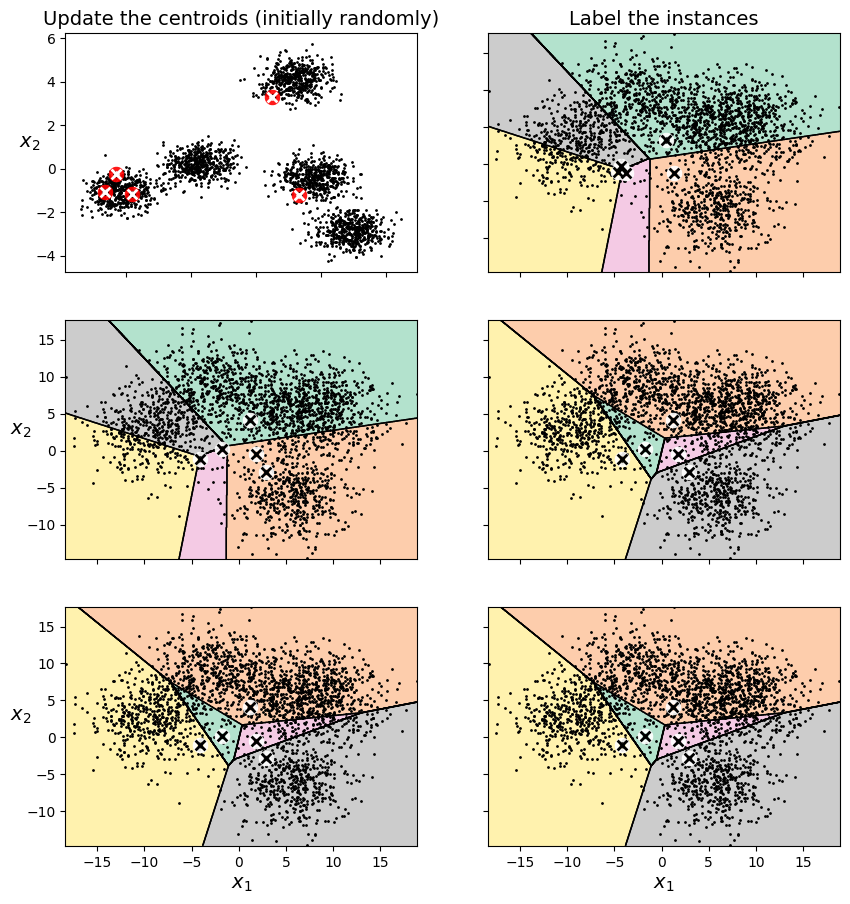

In [49]:
# Mostrar resultados
plt.figure(figsize=(10, 18))

plt.subplot(5, 2, 1)
plot_data(X_pca)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(5, 2, 2)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(5, 2, 3)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(5, 2, 4)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(5, 2, 5)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(5, 2, 6)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [50]:
# Cálculo del Silhouette Score para varios valores de k (de 2 a 9)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_pca) for k in range(1, 10)]

In [51]:
# Ignoramos k=1 porque el silhouette score no está definido para un solo grupo
silhouette_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_per_k[1:]]

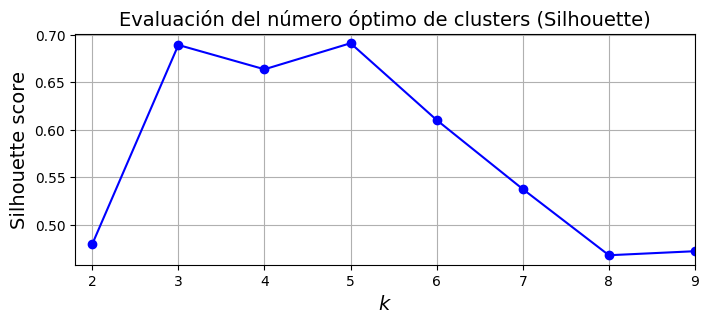

In [52]:
# Graficamos los puntajes
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Evaluación del número óptimo de clusters (Silhouette)", fontsize=14)
plt.axis([1.8, 9, min(silhouette_scores) - 0.01, max(silhouette_scores) + 0.01])
plt.grid(True)
plt.show()

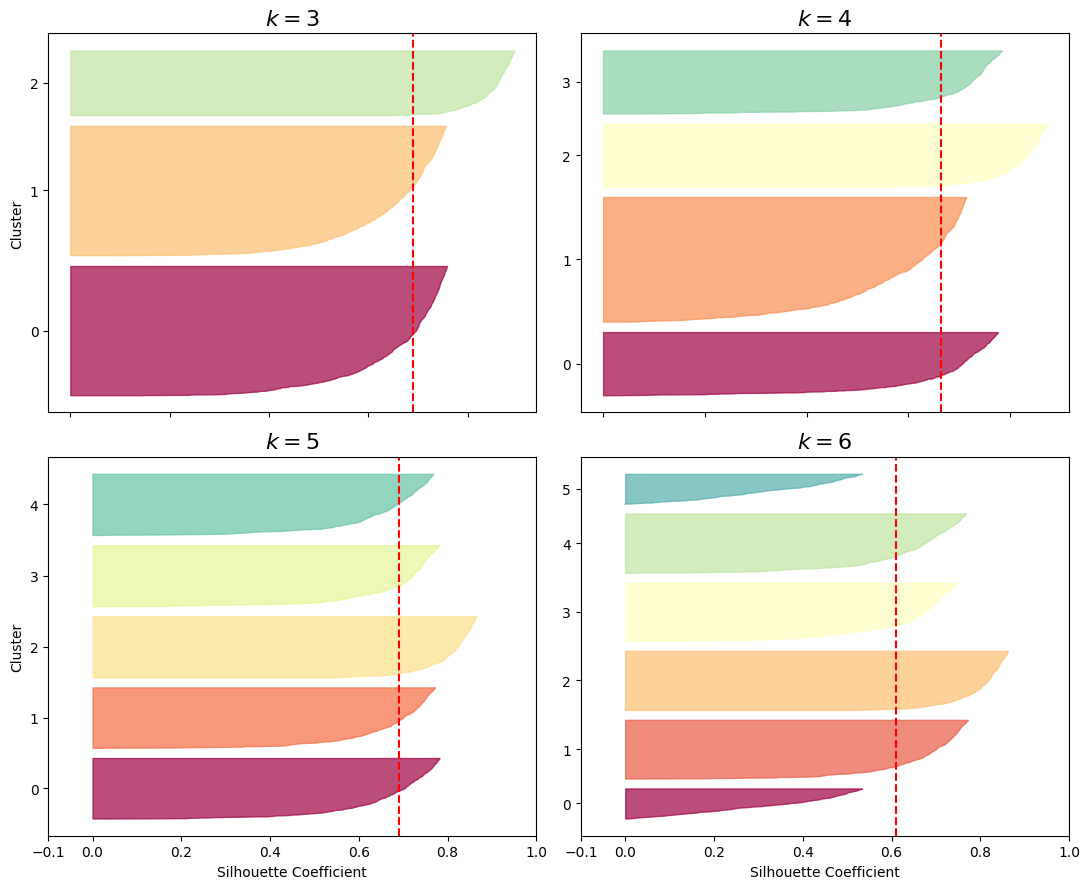

In [53]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    # Obtener predicciones para k clusters
    y_pred = kmeans_per_k[k - 1].labels_

    # Obtener los coeficientes de silhouette por muestra (usamos X_pca para coherencia)
    silhouette_coefficients = silhouette_samples(X_pca, y_pred)

    padding = len(X_pca) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Línea vertical con el promedio de silhouette para ese k
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()